# Final version (2 label)

### Import packages

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns; sns.set()

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

Load the normalized data set

In [2]:
##patients = pd.read_csv('normalized_data_2_labels.csv') #loading data
patients = pd.read_csv("C:/Users/Hev's/Desktop/normalized_data_2_labels.csv") 
patients.shape

(918, 12)

In [3]:
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
0,0.714286,1.0,0.000000,0.725,0.386401,1.0,1.0,0.633803,0.0,0.556818,1.0,0
1,0.795918,1.0,1.000000,0.800,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,1
2,0.795918,1.0,1.000000,0.600,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,1
3,0.183673,1.0,0.666667,0.650,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0
4,0.265306,0.0,0.333333,0.650,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0


## Checking the data if it is balanced or not.

Count of data in the targer variable AxesSubplot(0.125,0.125;0.775x0.755)


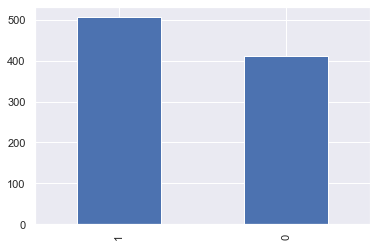

In [4]:
print("Count of data in the targer variable",patients['class'].value_counts().head(10).plot.bar())

#Our data is some where balanced

### Testing for correlation between all features in our dataset 

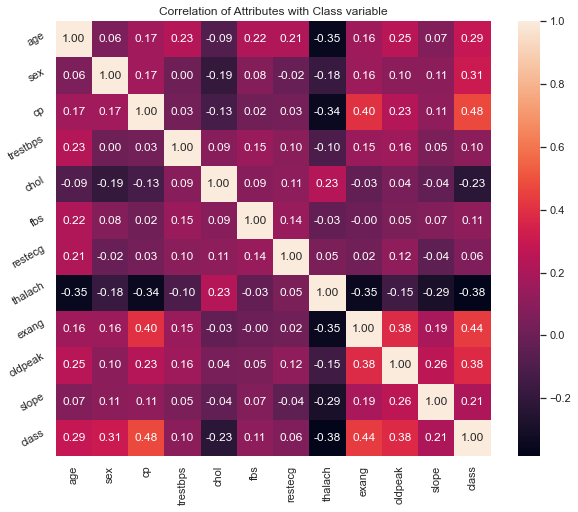

In [5]:
correlation= patients.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

Split the class label and features into separate data frames

In [6]:
pt_features = patients.drop('class', axis=1)
pt_class = patients['class']

Split the full (normazlied) data set into train (70%) and test (30%) sets

In [7]:
train_features, test_features, train_label, test_label = train_test_split(pt_features, pt_class, test_size=0.3, random_state=0)

In [8]:
train_features.shape

(642, 11)

In [9]:
test_features.shape

(276, 11)

Run decision tree classifier and do k-fold cross validation with k=10 on the train data set with scoring as F1macro

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy')
treescores = cross_val_score(clf, train_features, train_label, cv=10, scoring='f1_macro')

In [11]:
print(treescores)

[0.67195386 0.71766409 0.66790215 0.71764706 0.7030525  0.68472906
 0.7030525  0.6014944  0.79441562 0.77931034]


Run Random Forest with 10, 100 and 1000 trees

In [12]:
forest10 = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy', random_state=0)
forest100 = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy',random_state=0)
forest1000 = RandomForestClassifier(n_estimators=1000, max_depth=5, criterion='entropy', random_state=0)

In [13]:
forestscores10 = cross_val_score(forest10, train_features, train_label, cv=10, scoring='f1_macro')
forestscores100 = cross_val_score(forest100, train_features, train_label, cv=10, scoring='f1_macro')
forestscores1000 = cross_val_score(forest1000, train_features, train_label, cv=10, scoring='f1_macro')

Print all 10 F1 scores of the three random forests

In [14]:
print(forestscores10)

[0.70518023 0.74903475 0.82774651 0.84126984 0.79277709 0.77777778
 0.79562761 0.79441562 0.80780781 0.81176471]


In [15]:
print(forestscores100)

[0.67414657 0.76108797 0.84236453 0.87301587 0.84126984 0.77577578
 0.76510888 0.85767235 0.82604398 0.7641857 ]


In [16]:
print(forestscores1000)

[0.67195386 0.76363636 0.79562761 0.88930072 0.84126984 0.74374374
 0.78103617 0.87301587 0.84126984 0.77931034]


## Apply SVM

In [17]:
svmlinear = SVC(kernel='linear', random_state=0)
svmpoly = SVC(kernel='poly', gamma='auto',random_state=0)
svmrbf = SVC(kernel='rbf', gamma='auto',random_state=0)

In [18]:
svmscoreslinear = cross_val_score(svmlinear, train_features, train_label, cv=10, scoring='f1_macro')
svmscorespoly = cross_val_score(svmpoly, train_features, train_label, cv=10, scoring='f1_macro')
svmscoresrbf = cross_val_score(svmrbf, train_features, train_label, cv=10, scoring='f1_macro')

In [19]:
print(svmscoreslinear)

[0.68869732 0.78040541 0.82706952 0.84236453 0.82706952 0.79441562
 0.81176471 0.82706952 0.84126984 0.82706952]


In [20]:
print(svmscorespoly)

[0.56081081 0.7074153  0.82808303 0.76510888 0.73431013 0.76556777
 0.78103617 0.70130189 0.84375    0.74603175]


In [21]:
print(svmscoresrbf)

[0.70319635 0.78040541 0.81231672 0.85851142 0.81083744 0.77777778
 0.79562761 0.81083744 0.80780781 0.7964277 ]


## Compute mean

In [22]:
print("F1 score of decision tree: %0.2f (+/- %0.2f)" % (treescores.mean(), treescores.std() * 1.96))

F1 score of decision tree: 0.70 (+/- 0.10)


In [23]:
print("F1 score of forest with 10 trees: %0.2f (+/- %0.2f)" % (forestscores10.mean(), forestscores10.std() * 1.96))


F1 score of forest with 10 trees: 0.79 (+/- 0.07)


In [24]:
print("F1 score of forest with 100 trees: %0.2f (+/- %0.2f)" % (forestscores100.mean(), forestscores100.std() * 1.96))


F1 score of forest with 100 trees: 0.80 (+/- 0.11)


In [25]:
print("F1 score of forest with 1000 trees: %0.2f (+/- %0.2f)" % (forestscores1000.mean(), forestscores1000.std() * 1.96))


F1 score of forest with 1000 trees: 0.80 (+/- 0.12)


In [26]:
print("F1 score of Linear SVM: %0.2f (+/- %0.2f)" % (svmscoreslinear.mean(), svmscoreslinear.std() * 1.96))


F1 score of Linear SVM: 0.81 (+/- 0.09)


In [27]:
print("F1 score of Poly SVM: %0.2f (+/- %0.2f)" % (svmscorespoly.mean(), svmscorespoly.std() * 1.96))


F1 score of Poly SVM: 0.74 (+/- 0.15)


In [28]:
print("F1 score of RBF SVM: %0.2f (+/- %0.2f)" % (svmscoresrbf.mean(), svmscoresrbf.std() * 1.96))

F1 score of RBF SVM: 0.80 (+/- 0.07)


Train the best performing model of each type on the whole train data set

In [29]:
best_forest = forest100.fit(train_features, train_label)


In [30]:
best_svm = svmlinear.fit(train_features, train_label)

Run the model on test data

In [31]:
ypred_best_forest = best_forest.predict(test_features)

In [32]:
ypred_best_svm = best_svm.predict(test_features)

Prepare report for best model of each type - Forest

In [33]:
print(metrics.classification_report(test_label, ypred_best_forest))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       117
           1       0.84      0.87      0.85       159

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



In [34]:
print(round(metrics.accuracy_score(test_label,ypred_best_forest),ndigits=2))

0.83


In [35]:
print(round(metrics.precision_score(test_label,ypred_best_forest),ndigits=2))

0.84


In [36]:
print(round(metrics.recall_score(test_label,ypred_best_forest),ndigits=2))

0.87


In [37]:
print(round(metrics.f1_score(test_label,ypred_best_forest),ndigits=2))

0.85


In [38]:
print(round(metrics.roc_auc_score(test_label,ypred_best_forest),ndigits=2))

0.82


In [39]:
print(metrics.classification_report(test_label, ypred_best_svm))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       117
           1       0.84      0.82      0.83       159

    accuracy                           0.81       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.81      0.81       276



In [40]:
print(round(metrics.accuracy_score(test_label,ypred_best_svm),ndigits=2))

0.81


In [41]:
print(round(metrics.precision_score(test_label,ypred_best_svm),ndigits=2))

0.84


In [42]:
print(round(metrics.recall_score(test_label,ypred_best_svm),ndigits=2))

0.82


In [43]:
print(round(metrics.f1_score(test_label,ypred_best_svm),ndigits=2))

0.83


In [44]:
print(round(metrics.roc_auc_score(test_label,ypred_best_svm),ndigits=2))

0.81


## Heavens part (KNN, 2 label)

In [45]:
patients.isnull().sum()
patients.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
class       0
dtype: int64

In [46]:
patients.dtypes ## to assure all values have correct datatype

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
class         int64
dtype: object

#### Visualizing the colums of the training dataset

In [47]:
cols = train_features.columns

#### Scaling the data before importing to KNN (Very necessary)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)

test_features = scaler.transform(test_features)

#### Change the scaled data in to dataframe

In [49]:
train_features = pd.DataFrame(train_features, columns=[cols])
test_features = pd.DataFrame(test_features, columns=[cols])

#### Visualizind the scalled data 

In [50]:
train_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.739356,0.528095,0.817827,-0.333494,0.532984,-0.371884,1.742382,0.106674,1.352107,1.840300,0.302320
1,1.268999,-1.893598,-0.280593,0.480030,2.048218,2.689009,1.742382,0.721407,-0.739586,-0.041475,-1.638577
2,-0.955503,0.528095,0.817827,-0.062319,0.066026,-0.371884,0.500862,-0.431216,-0.739586,-0.794186,0.302320
3,-0.955503,0.528095,-0.280593,-0.604669,0.228032,-0.371884,-0.740657,1.182456,-0.739586,-0.794186,-1.638577
4,0.103784,0.528095,-0.280593,-0.604669,0.332859,-0.371884,-0.740657,0.452461,1.352107,0.617146,0.302320


In [51]:
test_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.209712,0.528095,0.817827,0.588499,0.247091,-0.371884,0.500862,0.414041,1.352107,1.558034,-1.638577
1,-0.531788,0.528095,0.817827,1.564728,0.628282,-0.371884,-0.740657,-1.353315,1.352107,0.146702,0.302320
2,-0.849574,0.528095,-2.477433,-1.147018,0.590163,-0.371884,-0.740657,-0.239112,-0.739586,0.334880,0.302320
3,1.692714,0.528095,0.817827,0.051574,0.828407,2.689009,0.500862,-0.027798,-0.739586,0.052614,0.302320
4,-0.214002,-1.893598,-0.280593,-0.604669,0.885586,-0.371884,1.742382,0.721407,-0.739586,-0.229653,-1.638577


### Creating KNN Model K=3

In [52]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(train_features, train_label)
knn_3_predicted = knn_3.predict(test_features)
knn_3_conf_matrix = confusion_matrix(test_label, knn_3_predicted)
knn_3_acc_score = accuracy_score(test_label, knn_3_predicted)
print("confussion matrix")
print(knn_3_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_3_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_3_predicted))


confussion matrix
[[ 82  35]
 [ 26 133]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 77.89855072463769 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       117
           1       0.79      0.84      0.81       159

    accuracy                           0.78       276
   macro avg       0.78      0.77      0.77       276
weighted avg       0.78      0.78      0.78       276



### Creating KNN Model K=5

In [53]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(train_features, train_label)
knn_5_predicted = knn_5.predict(test_features)
knn_5_conf_matrix = confusion_matrix(test_label, knn_5_predicted)
knn_5_acc_score = accuracy_score(test_label, knn_5_predicted)
print("confussion matrix")
print(knn_5_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_5_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_5_predicted))

confussion matrix
[[ 84  33]
 [ 21 138]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 80.43478260869566 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       117
           1       0.81      0.87      0.84       159

    accuracy                           0.80       276
   macro avg       0.80      0.79      0.80       276
weighted avg       0.80      0.80      0.80       276



### Creating KNN Model K=10

In [54]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(train_features, train_label)
knn_10_predicted = knn_10.predict(test_features)
knn_10_conf_matrix = confusion_matrix(test_label, knn_10_predicted)
knn_10_acc_score = accuracy_score(test_label, knn_10_predicted)
print("confussion matrix")
print(knn_10_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_10_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_10_predicted))

confussion matrix
[[ 86  31]
 [ 26 133]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 79.34782608695652 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       117
           1       0.81      0.84      0.82       159

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276



### Creating KNN Model K=13

In [55]:
knn_13= KNeighborsClassifier(n_neighbors=13)
knn_13.fit(train_features, train_label)
knn_13_predicted = knn_13.predict(test_features)
knn_13_conf_matrix = confusion_matrix(test_label, knn_13_predicted)
knn_13_acc_score = accuracy_score(test_label, knn_13_predicted)
print("confussion matrix")
print(knn_13_conf_matrix)
print("roc_auc")
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_13_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_13_predicted))

confussion matrix
[[ 83  34]
 [ 22 137]]
roc_auc
-------------------------------------------
Accuracy of K-NeighborsClassifier: 79.71014492753623 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       117
           1       0.80      0.86      0.83       159

    accuracy                           0.80       276
   macro avg       0.80      0.79      0.79       276
weighted avg       0.80      0.80      0.80       276



### ROC_AUC scores of all KNN models before cross validation

In [56]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_label, knn_3.predict(test_features))

print('ROC AUC_KNN_3 : {:.2f}'.format(ROC_AUC*100))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_label, knn_5.predict(test_features))

print('ROC AUC_KNN_5 : {:.2f}'.format(ROC_AUC*100))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_label, knn_10.predict(test_features))

print('ROC AUC_KNN_10 : {:.2f}'.format(ROC_AUC*100))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_label, knn_13.predict(test_features))

print('ROC AUC_KNN_13 : {:.2f}'.format(ROC_AUC*100))

ROC AUC_KNN_3 : 76.87
ROC AUC_KNN_5 : 79.29
ROC AUC_KNN_10 : 78.58
ROC AUC_KNN_13 : 78.55


## Cross validation

##### According the ROC_AUC score of each KNN model, KNN with K=5 outperfomed the other models. So the cross validation is performed only on KNN with K= 5

In [57]:
from sklearn.model_selection import cross_val_score

Cross_validated= cross_val_score(knn_5, train_features, train_label, cv=5, scoring='f1_macro').mean()

print('Cross_validated_KNN_5_on value_5 : {:.2f}'.format(Cross_validated*100),'\n')

Cross_validated= cross_val_score(knn_5, train_features, train_label, cv=7, scoring='f1_macro').mean()

print('Cross_validated_KNN_5_on value_7 : {:.2f}'.format(Cross_validated*100),'\n')

best_knn_5=Cross_validated

Cross_validated= cross_val_score(knn_5, train_features, train_label, cv=10, scoring='f1_macro').mean()

print('Cross_validated_KNN_5_on value_10 : {:.2f}'.format(Cross_validated*100),'\n')


## Crossvalidation of K-VALUE with the highets accuracy
# CV performed on the best KKN model (K=5) on different CV values and the best result is CV 10

Cross_validated_KNN_5_on value_5 : 78.11 

Cross_validated_KNN_5_on value_7 : 79.42 

Cross_validated_KNN_5_on value_10 : 78.41 



In [58]:
model_ev = pd.DataFrame({'Result of all models analayes after CV': ['KNN',best_knn_5*100]})
model_ev  

## summary of accuracy of all three models after CV

,Result of all models analayes after CV
0,KNN
1,79.418276
